<b>¡Hola RACHEL!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

En este proyecto buscaremos identificar cuál de las tarifas de prepago de Megaline (Surf o Ultimate) genera más ingresos. Este análisis ayudará a ajustar el presupuesto de publicidad. Para lograrlo limpiaremos y analizaremos los datos de 500 clientes sobre su tarifa, llamadas y mensajes de texto en 2018, además, calcularemos y compararemos los ingresos generados por cada tarifa. Se utilizarán también gráficas para que pueda ser más entendible la información.


## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
from scipy import stats as st
import math
import matplotlib.pyplot as plt

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
msn_df = pd.read_csv('/datasets/megaline_messages.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv')


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Importaste correctamente todas las librerías necesarias y cargaste los archivos CSV en DataFrames, verificando las primeras filas para entender el contenido de cada DataFrame.
</div>

## Preparar los datos

Procederemos a visualizar las primeras 5 filas de cada DF para analizar la información que contiene cada una.


In [3]:
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [5]:
msn_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [6]:
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


El user Id se repite en varios Df.

Sólo en el ultimo Df parece que tiene datos nulos, esto podría deberse a que en esa columna se coloca la fecha en que los usuarios se dieron de baja, por lo que si aparecen datos nulos significa que aún dados de alta. 



## Tarifas

In [8]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
# Imprime una muestra de los datos para las tarifas
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
plans_df.duplicated().sum()

0

La información que se percibe es fácil de leer ya que solo muestra los dos planes y lo que ofrece cada uno. No existen datos duplicados. El único problema que podría haber es que los datos que incluye el plan estan en mb, mientras que el pago se encuentra en gb. Más adelante tendremos que redondearlos y transformarlos a Gb.

## Corregir datos

No se encontró información nula en esta tabla o que pudiera afectar después nuestro manejo de datos. 

## Enriquecer los datos

Más adelante se procederá a redondear los Mb para posteriormente convertirlos a Gb y se pueda calcular un costo aproximado para los usuarios que excedieron ese servicio de su respectivo plan. 

## Usuarios/as

In [11]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
# Imprime una muestra de datos para usuarios
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [13]:
users_df.duplicated().sum()

0

Tanto la fecha de registro como la fecha en que se dio de baja el usuario aparecen en un formato incorrecto. Se procederá a ponerlos en el adecuado. Los datos que aparecen ausentes son por que los usuarios estan activos, sino aparecería lo contrario

Adicionalmente, se procederá a cambiar el nombre del plan a plan_id para un mejor manejo de datos.

### Corregir los datos

In [14]:
users_df['reg_date']=pd.to_datetime(users_df['reg_date'],format='%Y-%m-%d')
users_df['churn_date']=pd.to_datetime(users_df['churn_date'],format='%Y-%m-%d')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

Además de cambiar 'plan' a 'plan_id', vamos a crear una columna de mes, por que esto nos ayudará después en la unión de nuestros Df.

In [15]:
users_df.rename(columns={'plan': 'plan_id'}, inplace=True)
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan_id,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


In [16]:
users_df['reg_mes']=pd.DatetimeIndex(users_df['reg_date']).month
users_df['churn_mes']=pd.DatetimeIndex(users_df['churn_date']).month
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan_id,churn_date,reg_mes,churn_mes
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5,NaN


## Llamadas

In [17]:
# Imprime una muestra de datos para las llamadas
calls_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [18]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [19]:
calls_df.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [20]:
calls_df.duplicated().sum()

0

In [21]:
calls_df.duplicated(subset=['id','user_id']).sum()

0

In [22]:
calls_df.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Con la informacion proporcionada en info() nos dimos cuenta que el formato de fecha no es el adecuado, procederemos a corregirlo, además nos percatamos de que en los primero 3 cuartiles se encuentra la mayor parte de los usuarios.
Además, procederemos a cambiar 'id' por 'call_id' para el mejor manejo de los datos y que no sea confuso en un futuro al realizar el análisis. También se procederá a crear la columna mes y a redondear los minutos usados en las llamadas, para que de esta forma sea más fácil calcular los excedentes.

### Corregir los datos

In [23]:
calls_df['call_date']=pd.to_datetime(calls_df['call_date'],format='%Y-%m-%d')

In [24]:
calls_df.info()
calls_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Enriquecer los datos

In [25]:
calls_df.rename(columns={'id': 'call_id'}, inplace=True)

In [26]:
calls_df.head()

,call_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [27]:
calls_df['mes']=pd.DatetimeIndex(calls_df['call_date']).month

In [28]:
calls_df.head()

,call_id,user_id,call_date,duration,mes
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [29]:
def redondeo_llamadas(duration):
    redondeo = math.ceil(duration)
    return redondeo

In [30]:
calls_df['duracion_redondeada'] = calls_df['duration'].apply(redondeo_llamadas)
calls_df.head()

,call_id,user_id,call_date,duration,mes,duracion_redondeada
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5


## Mensajes

In [31]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
msn_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [32]:
# Imprime una muestra de datos para los mensajes
msn_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [33]:
msn_df.duplicated().sum()

0

No existen duplicados ni datos nulos.Igualmente, procederemos a cambiar el formato de fecha, anexar una columna de mes y a cambiar el nombre del id para que no sea confuso.

### Corregir los datos

In [34]:
msn_df['message_date']=pd.to_datetime(msn_df['message_date'],format='%Y-%m-%d')
msn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

In [35]:
msn_df['mes']=pd.DatetimeIndex(msn_df['message_date']).month
msn_df.head()

,id,user_id,message_date,mes
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [36]:
msn_df.rename(columns={'id': 'msn_id'}, inplace=True)
msn_df.head()

,msn_id,user_id,message_date,mes
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [37]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [38]:
# Imprime una muestra de datos para el tráfico de internet
internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [39]:
internet_df.duplicated().sum()

0

In [40]:
internet_df.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


No existen duplicados ni datos nulos.Igualmente, procederemos a cambiar el formato de fecha, anexar una columna de mes y a cambiar el nombre del id para que no sea confuso.

Aquí seguiremos usando la información en Mb, más adelante se realizará la conversión.

### Corregir los datos

In [41]:
internet_df['session_date']=pd.to_datetime(internet_df['session_date'],format='%Y-%m-%d')

In [42]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

In [43]:
internet_df['mes']=pd.DatetimeIndex(internet_df['session_date']).month
internet_df.head()

,id,user_id,session_date,mb_used,mes
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [44]:
(len(internet_df.query('mb_used == 0')) / len(internet_df))*100

13.11423801574052

In [45]:
internet_df.rename(columns={'id': 'internet_id'}, inplace=True)
internet_df.head()

,internet_id,user_id,session_date,mb_used,mes
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


Aparentemente, alrededor de 13% de usuarios - mes no esta usando el internet.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
    
Identificaste y explicaste correctamente los valores nulos en el DataFrame users_df, concluyendo que los valores nulos en churn_date significan que los usuarios aún están activos.
    
Renombraste columnas para mejorar la claridad, como plan a plan_id y id a call_id, msn_id, internet_id en los respectivos DataFrames.
    
Corregiste los formatos de fecha y añadiste columnas adicionales como el mes de registro y el mes de baja para los usuarios.
    
Calculaste nuevas columnas, como duracion_redondeada en calls_df y total_gb_usados en internet_df, convirtiendo megabytes a gigabytes.  

    
</div>

## Estudiar las condiciones de las tarifas

Volveremos a checar la información que contiene para asegurarnos de lo que realizaremos.

In [46]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans_df.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario



Vamos a calcular el número de llamadas y la cantidad de minutos por usuario y por mes. Vamos a resetear los índices para que las tablas sean más entendibles.

In [47]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_analytics = calls_df.pivot_table(index=['user_id', 'mes'],values='duracion_redondeada',aggfunc=['sum','count'])
calls_analytics.head()


sum               count
            duracion_redondeada duracion_redondeada
user_id mes                                        
1000    12                  124                  16
1001    8                   182                  27
        9                   315                  49
        10                  393                  65
        11                  426                  64

In [48]:
calls_analytics.columns =['minutos','llamadas_hechas']
calls_analytics=calls_analytics.reset_index()
calls_analytics.head()

,user_id,mes,minutos,llamadas_hechas
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64


In [115]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
##Ya aparece en el cuadro de arriba

In [50]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
msn_analytics = msn_df.pivot_table(index=['user_id', 'mes'],values='msn_id',aggfunc=['count'])
msn_analytics.head()


count
            msn_id
user_id mes       
1000    12      11
1001    8       30
        9       44
        10      53
        11      36

In [51]:
msn_analytics.columns = ['num_mensajes']
msn_analytics = msn_analytics.reset_index()
msn_analytics

,user_id,mes,num_mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [52]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_analytics = internet_df.pivot_table(index=['user_id', 'mes'],values='mb_used', aggfunc=['sum'])
internet_analytics.head()


sum
              mb_used
user_id mes          
1000    12    1901.47
1001    8     6919.15
        9    13314.82
        10   22330.49
        11   18504.30

In [53]:
internet_analytics.columns=['total_mb_usados']
internet_analytics = internet_analytics.reset_index()
internet_analytics

,user_id,mes,total_mb_usados
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


Procederemos a convertir los datos de Mg a Gb y uniremos tablas para una mejor comprensión de la información.

In [54]:
def datos_redondeo(mb):
    redondeo=math.ceil(mb/1024)
    return redondeo

In [55]:
internet_analytics['total_gb_usados'] = internet_analytics ['total_mb_usados'].apply(datos_redondeo)
internet_analytics.drop(columns = ['total_mb_usados'], inplace = True)
internet_analytics

,user_id,mes,total_gb_usados
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
...,...,...,...
2272,1498,12,23
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


In [56]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
tabla_consumo_total = calls_analytics.merge(msn_analytics, on=['user_id','mes'], how= 'outer').merge(internet_analytics, on= ['user_id','mes'], how= 'outer')
tabla_consumo_total

,user_id,mes,minutos,llamadas_hechas,num_mensajes,total_gb_usados
0,1000,12,124.0,16.0,11.0,2.0
1,1001,8,182.0,27.0,30.0,7.0
2,1001,9,315.0,49.0,44.0,14.0
3,1001,10,393.0,65.0,53.0,22.0
4,1001,11,426.0,64.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13.0
2289,1361,5,NaN,NaN,2.0,2.0
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,1.0


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
    
Realizaste una unión de DataFrames para crear un DataFrame consolidado con información de llamadas, mensajes e internet por usuario y mes.

    
</div>

In [57]:
# Añade la información de la tarifa
plan_analytics = users_df[['user_id', 'plan_id', 'city']]
plan_analytics

,user_id,plan_id,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...
495,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,surf,"New Orleans-Metairie, LA MSA"
497,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [58]:
tabla_general = tabla_consumo_total.merge(plan_analytics, on= ['user_id'], how= 'outer')
tabla_general

,user_id,mes,minutos,llamadas_hechas,num_mensajes,total_gb_usados,plan_id,city
0,1000,12.0,124.0,16.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,182.0,27.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,315.0,49.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,393.0,65.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,426.0,64.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2299,1319,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA"
2300,1378,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA"
2301,1463,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"


In [59]:
len(tabla_consumo_total['user_id'].unique())
# solo hay 490 usarios que consumieron al menos algo en 2018

490

In [60]:
len(tabla_general[tabla_general['mes'].isna()])
# hay 10 usuarios que no realizaron ningun consumo

10

Procederemos a calcular los ingresos mensuales por usuario.

In [61]:
# Calcula el ingreso mensual para cada usuario


In [62]:
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Vamos a crear una variable para calcular los costos por cobrar de las llamadas, posteriormente lo haremos para mensajes y Gb.

In [63]:
surf_monthly_charge = 20
surf_monthly_minutes = 500
surf_monthly_messages = 50
surf_monthly_data = 15
surf_call_charge = 0.03
surf_message_charge = 0.03
surf_data_charge = 10

ultimate_monthly_charge = 70
ultimate_monthly_minutes = 3000
ultimate_monthly_messages = 1000
ultimate_monthly_data = 30
ultimate_call_charge = 0.01
ultimate_message_charge = 0.01
ultimate_data_charge = 7

In [64]:
def calls_to_charge(fila):
    plan = fila ['plan_id']
    minutos = fila ['minutos'] 
    
    minutos_cobrables = 0
    
    if plan == 'surf':
        if minutos > surf_monthly_minutes:
            minutos_cobrables = minutos - surf_monthly_minutes
    elif plan == 'ultimate':
        if minutos > ultimate_monthly_minutes:
            minutos_cobrables = minutos - ultimate_monthly_minutes
    return minutos_cobrables

In [65]:
tabla_general['minutos_cobrables'] = tabla_general.apply(calls_to_charge,axis=1)
tabla_general.sample(5)

,user_id,mes,minutos,llamadas_hechas,num_mensajes,total_gb_usados,plan_id,city,minutos_cobrables
1676,1366,10.0,651.0,98.0,12.0,20.0,surf,"Cincinnati, OH-KY-IN MSA",151.0
430,1091,11.0,532.0,72.0,51.0,7.0,ultimate,"Riverside-San Bernardino-Ontario, CA MSA",0.0
402,1084,10.0,233.0,29.0,36.0,8.0,surf,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",0.0
475,1101,7.0,302.0,47.0,66.0,14.0,surf,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",0.0
426,1090,10.0,453.0,74.0,21.0,13.0,surf,"Indianapolis-Carmel-Anderson, IN MSA",0.0


In [66]:
len(tabla_general.query('minutos_cobrables > 0'))/len(tabla_general) *100

24.57663916630482

Se va a cobrar aproximadamente el 24% de las llamadas extras.


In [67]:
def messages_to_charge(fila):
    plan = fila ['plan_id']
    num_mensajes = fila ['num_mensajes'] 
    
    mensajes_cobrables = 0
    
    if plan == 'surf':
        if num_mensajes > surf_monthly_messages:
            mensajes_cobrables = num_mensajes - surf_monthly_messages
    elif plan == 'ultimate':
        if num_mensajes > ultimate_monthly_messages:
            mensajes_cobrables = num_mensajes - ultimate_monthly_messages
    return mensajes_cobrables

In [68]:
tabla_general['mensajes_cobrables'] = tabla_general.apply(messages_to_charge,axis=1)
tabla_general.sample(6)

,user_id,mes,minutos,llamadas_hechas,num_mensajes,total_gb_usados,plan_id,city,minutos_cobrables,mensajes_cobrables
1024,1220,10.0,634.0,91.0,35.0,20.0,surf,"Cincinnati, OH-KY-IN MSA",134.0,0.0
2239,1495,10.0,610.0,75.0,NaN,27.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",110.0,0.0
106,1029,9.0,763.0,116.0,9.0,14.0,surf,"Tampa-St. Petersburg-Clearwater, FL MSA",263.0,0.0
1109,1241,12.0,582.0,80.0,45.0,14.0,surf,"Richmond, VA MSA",82.0,0.0
1028,1222,6.0,14.0,2.0,2.0,NaN,surf,"Los Angeles-Long Beach-Anaheim, CA MSA",0.0,0.0
1001,1214,10.0,516.0,68.0,16.0,22.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",0.0,0.0


In [69]:
len(tabla_general.query('mensajes_cobrables > 0'))/len(tabla_general) *100


14.763352149370387

Aproximadamente se cobrará el 14% de los mensajes.

In [70]:
def gb_to_charge(fila):
    plan = fila ['plan_id']
    total_gb_usados = fila ['total_gb_usados'] 
    
    gb_to_charge = 0
    
    if plan == 'surf':
        if total_gb_usados > surf_monthly_data:
            gb_to_charge = total_gb_usados - surf_monthly_data
    elif plan == 'ultimate':
        if total_gb_usados > ultimate_monthly_data:
            gb_to_charge = total_gb_usados - ultimate_monthly_data
    return gb_to_charge

In [71]:
tabla_general['gb_cobrables'] = tabla_general.apply(gb_to_charge,axis=1)
tabla_general.sample(6)

,user_id,mes,minutos,llamadas_hechas,num_mensajes,total_gb_usados,plan_id,city,minutos_cobrables,mensajes_cobrables,gb_cobrables
1308,1285,11.0,314.0,54.0,25.0,3.0,surf,"Los Angeles-Long Beach-Anaheim, CA MSA",0.0,0.0,0.0
1814,1397,11.0,623.0,98.0,NaN,18.0,surf,"Oklahoma City, OK MSA",123.0,0.0,3.0
1111,1242,11.0,264.0,38.0,62.0,15.0,surf,"San Antonio-New Braunfels, TX MSA",0.0,12.0,0.0
1258,1270,12.0,283.0,50.0,28.0,25.0,ultimate,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",0.0,0.0,0.0
146,1041,3.0,23.0,4.0,NaN,2.0,ultimate,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0,0.0
1490,1329,12.0,1369.0,191.0,97.0,26.0,ultimate,"Charleston-North Charleston, SC MSA",0.0,0.0,0.0


In [72]:
len(tabla_general.query('gb_cobrables > 0'))/len(tabla_general) *100

41.33738601823708

Aproximadamente se cobrará el 41% de los gb extras usados, es de donde más se recaudará.


Ahora vamos a calcular el gasto total por mes por usuario y mostraremos tablas de minutos, mensajes y gb que se usaron.

In [73]:
def rentabilidad_mensual(fila):
    plan = fila['plan_id']
    calls_to_charge = fila['minutos_cobrables']
    messages_to_charge = fila['mensajes_cobrables']
    gb_to_charge =fila['gb_cobrables']
    rentabilidad = 0
   
    if plan == 'surf':
        rentabilidad = surf_monthly_charge + (calls_to_charge*surf_call_charge) + (messages_to_charge*surf_message_charge) + (gb_to_charge*surf_data_charge)
    elif plan == 'ultimate':
        rentabilidad = ultimate_monthly_charge + (calls_to_charge*ultimate_call_charge) + (messages_to_charge*ultimate_message_charge) + (gb_to_charge*ultimate_data_charge)
    return rentabilidad
        


In [74]:
tabla_general['rentabilidad_mensual'] = tabla_general.apply(rentabilidad_mensual,axis=1)
tabla_general

,user_id,mes,minutos,llamadas_hechas,num_mensajes,total_gb_usados,plan_id,city,minutos_cobrables,mensajes_cobrables,gb_cobrables,rentabilidad_mensual
0,1000,12.0,124.0,16.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,70.00
1,1001,8.0,182.0,27.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
2,1001,9.0,315.0,49.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
3,1001,10.0,393.0,65.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,7.0,90.09
4,1001,11.0,426.0,64.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,4.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,0.0,0.0,20.00
2299,1319,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0,0.0,0.0,20.00
2300,1378,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0,0.0,0.0,20.00
2301,1463,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,70.00


In [75]:
variables = ['minutos','num_mensajes','total_gb_usados']

In [76]:
plans = ['surf','ultimate']

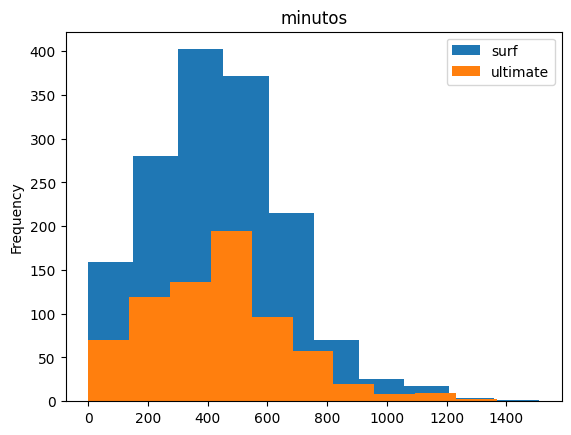

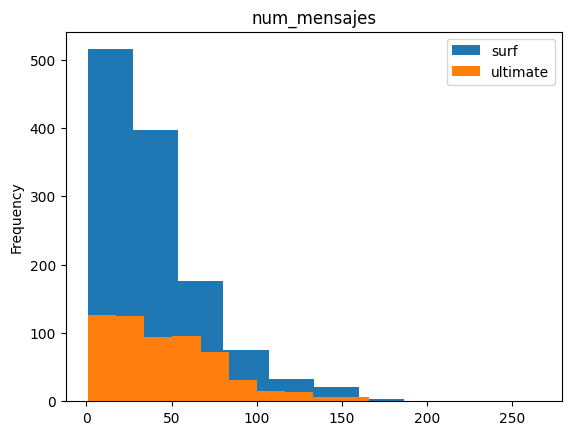

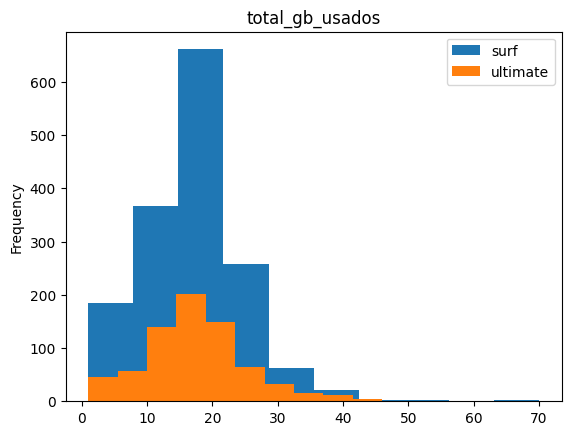

In [77]:
for metrica in variables:
    for plan in plans:
        tabla_general[tabla_general['plan_id'] == plan][metrica].plot(kind='hist')
        
    plt.title(metrica)
    plt.legend(plans)
    plt.show()

## Estudia el comportamiento de usuario

Mostraremos gráficos sobre la media de la duración de las llamadas y del número de minutos mensuales que necesitan los usuarios por cada plan, esto se realizará para facilitar la comprensión de los datos. 



### Llamadas

In [78]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
mean_duration_calls = tabla_general.groupby(['plan_id', 'mes'])['minutos'].mean().reset_index()
mean_duration_calls.sample(6)

,plan_id,mes,minutos
22,ultimate,11.0,448.730159
2,surf,3.0,330.000000
23,ultimate,12.0,465.261745
12,ultimate,1.0,193.500000
20,ultimate,9.0,437.511628
8,surf,9.0,420.732984


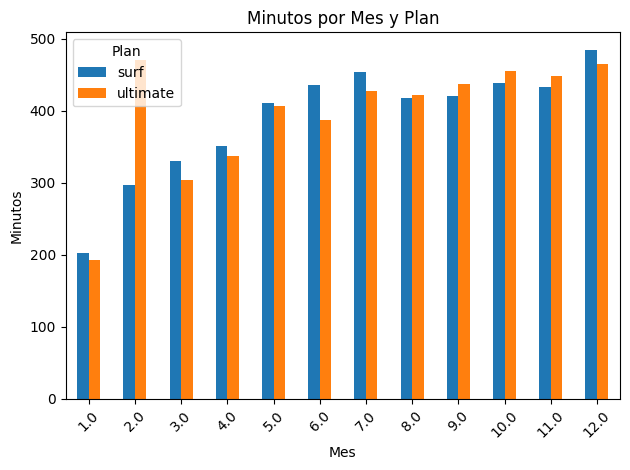

In [79]:
df_duration_calls_grouped = mean_duration_calls.groupby(['mes', 'plan_id'])['minutos'].sum().reset_index()
df_duration_calls_pivot = df_duration_calls_grouped.pivot(index='mes', columns='plan_id', values='minutos').fillna(0)
ax = df_duration_calls_pivot.plot(kind='bar')
ax.set_xlabel('Mes')
ax.set_ylabel('Minutos')
ax.set_title('Minutos por Mes y Plan')
plt.xticks(rotation=45) 
plt.legend(title='Plan')
plt.tight_layout() 
plt.show()

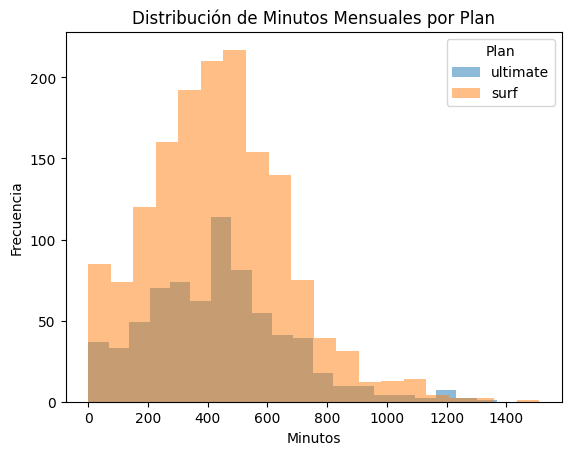

In [80]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
for plan in tabla_general['plan_id'].unique():
    subset = tabla_general[tabla_general['plan_id'] == plan]
    subset['minutos'].plot(kind='hist', alpha=0.5, label=plan, bins=20)
plt.title('Distribución de Minutos Mensuales por Plan')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()


Procederemos a calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas, además se realizarán diagramas de cajas para mayor comprensión. Se calculará de forma general (sobre las dos tablas) y de forma independiente de cada una de ellas.

In [81]:
# Calcula la media y la varianza de la duración mensual de llamadas.
tabla_general_filtrada = tabla_general.dropna(subset=['minutos'])
mean_duration = tabla_general_filtrada['minutos'].mean()
mean_duration_surf = tabla_general_filtrada[tabla_general_filtrada['plan_id']=='surf']['minutos'].mean()
mean_duration_ultimate = tabla_general_filtrada[tabla_general_filtrada['plan_id']=='ultimate']['minutos'].mean()
print(f"Media de la duración mensual de llamadas: {mean_duration}")
print(f"Media de la duración mensual de llamadas de usuarios surf: {mean_duration_surf}")
print(f"Media de la duración mensual de llamadas de usuarios ultimate: {mean_duration_ultimate}")

Media de la duración mensual de llamadas: 435.9375553587245
Media de la duración mensual de llamadas de usuarios surf: 436.51974110032364
Media de la duración mensual de llamadas de usuarios ultimate: 434.67601683029454


In [82]:
variance_duration = tabla_general_filtrada['minutos'].var()
variance_duration_surf = tabla_general_filtrada[tabla_general_filtrada['plan_id']=='surf']['minutos'].var()
variance_duration_ultimate = tabla_general_filtrada[tabla_general_filtrada['plan_id']=='ultimate']['minutos'].var()
print(f"Varianza de la duración mensual de llamadas: {variance_duration}")
print(f"Varianza de la duración mensual de llamadas de usuarios surf: {variance_duration_surf}")
print(f"Varianza de la duración mensual de llamadas de usuarios ultimate: {variance_duration_ultimate}")

Varianza de la duración mensual de llamadas: 53811.16800855365
Varianza de la duración mensual de llamadas de usuarios surf: 52571.06324345624
Varianza de la duración mensual de llamadas de usuarios ultimate: 56573.63224703341


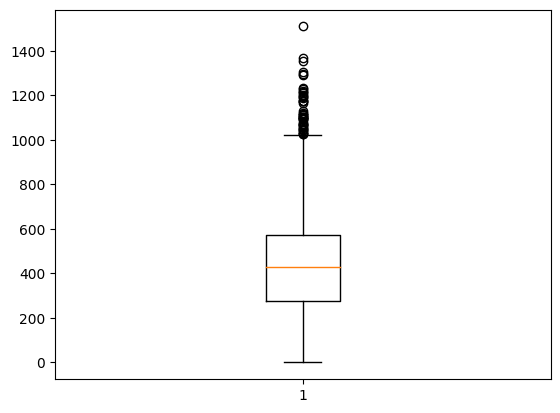

In [83]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.boxplot(tabla_general['minutos'].dropna())
plt.show()

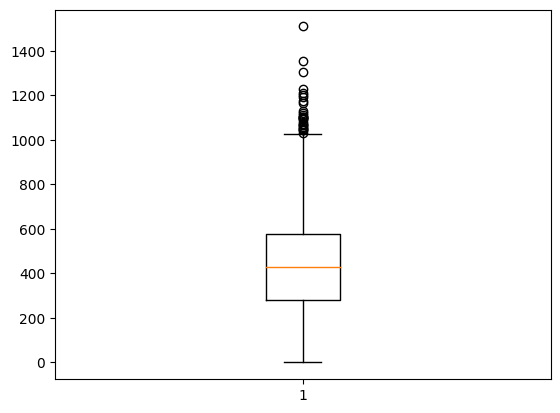

In [84]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.boxplot(tabla_general[tabla_general['plan_id']=='surf']['minutos'].dropna())
plt.show()

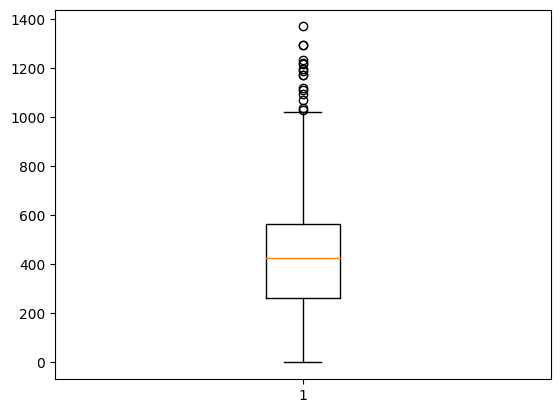

In [85]:
plt.boxplot(tabla_general[tabla_general['plan_id']=='ultimate']['minutos'].dropna())
plt.show()

Aparentemente los datos no los minutos no parecen muy diferentes con respecto a cada plan. Los datos de la media parecen ser muy similares, en la varianza ya comienzan a verse las diferencias y en los diagramas de caja se puede percibir los out layers.

### Mensajes

Mostraremos gráficos sobre la media y la varianza de los mensajes de los usuarios en cada plan. Además mostraremos gráficas de cajas. 

In [86]:
mean_messages = tabla_general.groupby(['plan_id', 'mes'])['num_mensajes'].mean().reset_index()
mean_messages.sample(6)

,plan_id,mes,num_mensajes
22,ultimate,11.0,47.601942
7,surf,8.0,37.596774
11,surf,12.0,48.326772
1,surf,2.0,21.600000
14,ultimate,3.0,34.714286
2,surf,3.0,21.937500


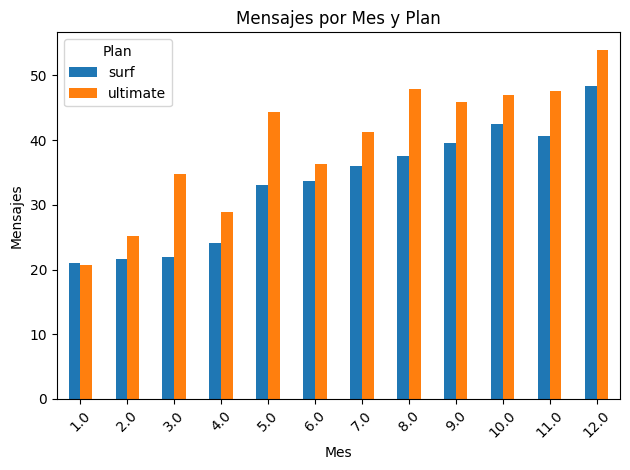

In [87]:
df_mensajes_grouped = mean_messages.groupby(['mes', 'plan_id'])['num_mensajes'].sum().reset_index()
df_mensajes_pivot = df_mensajes_grouped.pivot(index='mes', columns='plan_id', values='num_mensajes').fillna(0)
ax = df_mensajes_pivot.plot(kind='bar')
ax.set_xlabel('Mes')
ax.set_ylabel('Mensajes')
ax.set_title('Mensajes por Mes y Plan')
plt.xticks(rotation=45) 
plt.legend(title='Plan')
plt.tight_layout() 
plt.show()

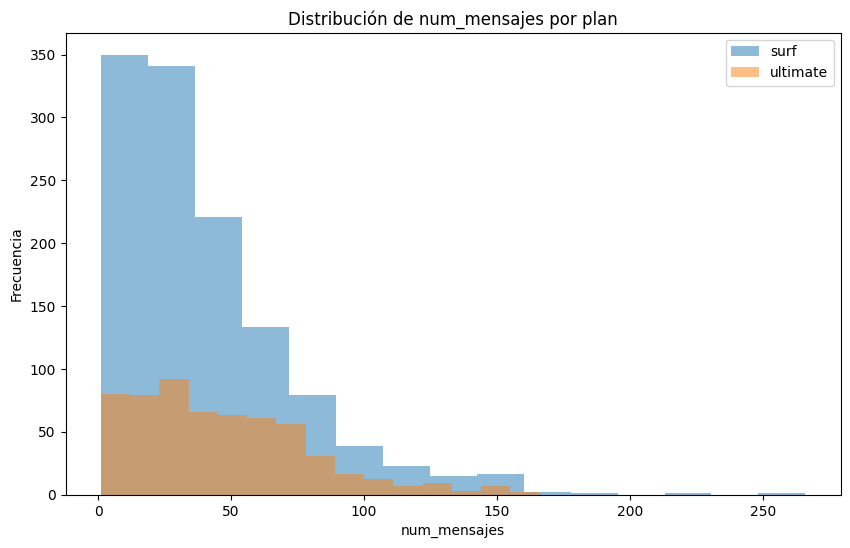

In [88]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
metrica = 'num_mensajes'
plt.figure(figsize=(10, 6))
for plan in plans:
    subset = tabla_general[tabla_general['plan_id'] == plan]
    subset[metrica].plot(kind='hist', alpha=0.5, label=plan, bins=15)
    
plt.title(f'Distribución de {metrica} por plan')
plt.xlabel(metrica)
plt.ylabel('Frecuencia')
plt.legend(plans)
plt.show()


In [89]:

tabla_general_filtrada_mensajes = tabla_general.dropna(subset=['num_mensajes'])
mean_mensajes = tabla_general_filtrada_mensajes['num_mensajes'].mean()
mean_mensajes_surf = tabla_general_filtrada_mensajes[tabla_general_filtrada_mensajes['plan_id']=='surf']['num_mensajes'].mean()
mean_mensajes_ultimate = tabla_general_filtrada_mensajes[tabla_general_filtrada_mensajes['plan_id']=='ultimate']['num_mensajes'].mean()
print(f"Media de mensajes mensuales: {mean_mensajes}")
print(f"Media de mensajes mensuales de usuarios surf: {mean_mensajes_surf}")
print(f"Media de mensajes mensuales de usuarios ultimate: {mean_mensajes_ultimate}")

Media de mensajes mensuales: 42.110188261351055
Media de mensajes mensuales de usuarios surf: 40.10965630114566
Media de mensajes mensuales de usuarios ultimate: 46.29623287671233


In [90]:
tabla_general_filtrada_mensajes = tabla_general.dropna(subset=['num_mensajes'])
mean_mensajes = tabla_general_filtrada_mensajes['num_mensajes'].var()
mean_mensajes_surf = tabla_general_filtrada_mensajes[tabla_general_filtrada_mensajes['plan_id']=='surf']['num_mensajes'].var()
mean_mensajes_ultimate = tabla_general_filtrada_mensajes[tabla_general_filtrada_mensajes['plan_id']=='ultimate']['num_mensajes'].var()
print(f"Varianza de mensajes mensuales: {mean_mensajes}")
print(f"Varianza de mensajes mensuales de usuarios surf: {mean_mensajes_surf}")
print(f"Varianza de mensajes mensuales de usuarios ultimate: {mean_mensajes_ultimate}")

Varianza de mensajes mensuales: 1097.1285720421004
Varianza de mensajes mensuales de usuarios surf: 1091.3442310038054
Varianza de mensajes mensuales de usuarios ultimate: 1085.183107568317


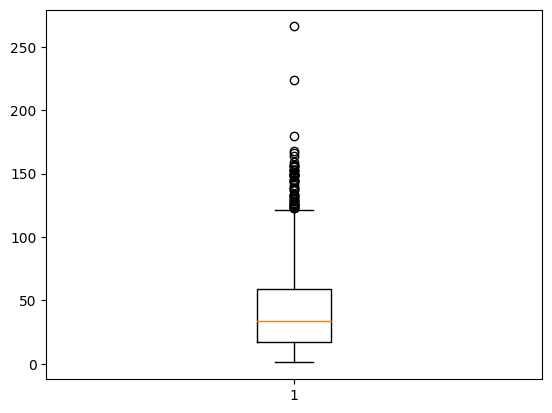

In [91]:
plt.boxplot(tabla_general['num_mensajes'].dropna())
plt.show()

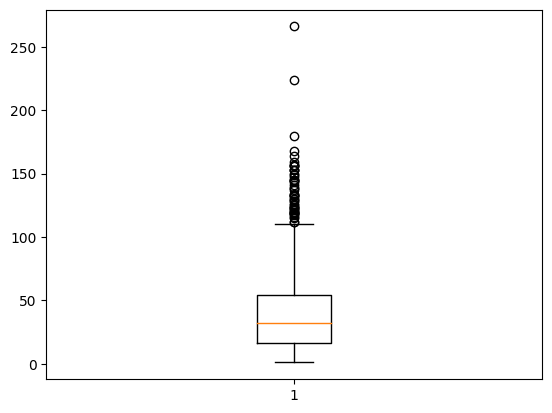

In [92]:
plt.boxplot(tabla_general[tabla_general['plan_id']=='surf']['num_mensajes'].dropna())
plt.show()

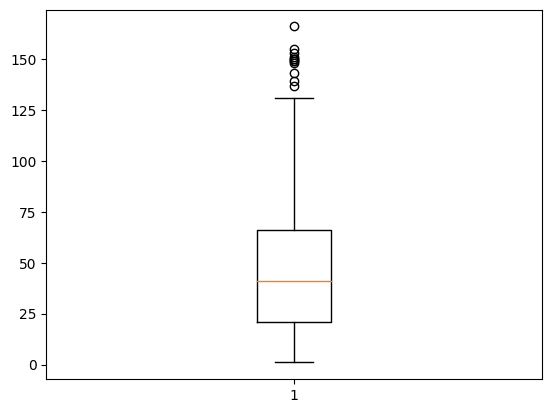

In [93]:
plt.boxplot(tabla_general[tabla_general['plan_id']=='ultimate']['num_mensajes'].dropna())
plt.show()

Aparentemente los datos de los mensajes no parecen muy diferentes con respecto a cada plan. Los datos de la media parecen ser un poco diferentes, en la varianza se ven muy similares y en los diagramas de caja se puede percibir los out layers mayormente en el plan surf.

### Internet

Mostraremos la media, varianza y gráficos sobre los Gb usados por cada usuario en cada plan, para así poder analizarlos mejor. 

In [94]:
mean_internet = tabla_general.groupby(['plan_id', 'mes'])['total_gb_usados'].mean().reset_index()
mean_internet.sample(6)

,plan_id,mes,total_gb_usados
1,surf,2.0,12.222222
11,surf,12.0,18.296530
15,ultimate,4.0,16.333333
19,ultimate,8.0,17.845070
7,surf,8.0,17.201258
18,ultimate,7.0,16.491525


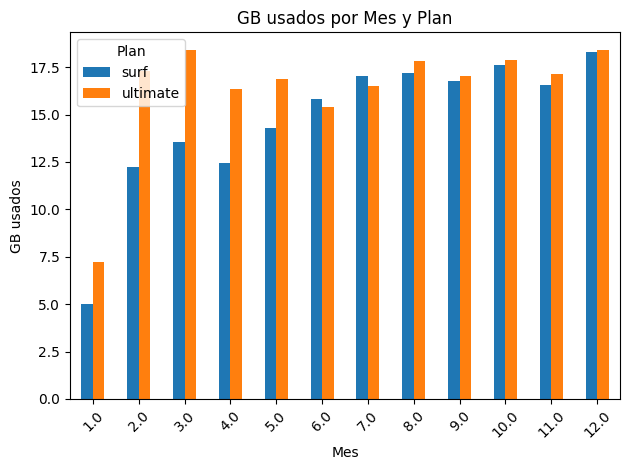

In [95]:
df_internet_grouped = mean_internet.groupby(['mes', 'plan_id'])['total_gb_usados'].sum().reset_index()
df_internet_pivot = df_internet_grouped.pivot(index='mes', columns='plan_id', values='total_gb_usados').fillna(0)
ax = df_internet_pivot.plot(kind='bar')
ax.set_xlabel('Mes')
ax.set_ylabel('GB usados')
ax.set_title('GB usados por Mes y Plan')
plt.xticks(rotation=45) 
plt.legend(title='Plan')
plt.tight_layout() 
plt.show()

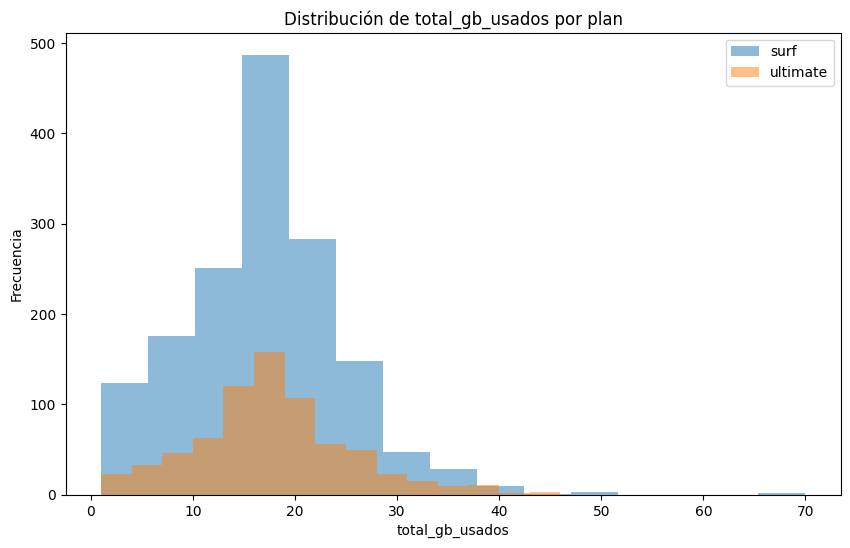

In [96]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
metrica = 'total_gb_usados'
plt.figure(figsize=(10, 6))
for plan in plans:
    subset = tabla_general[tabla_general['plan_id'] == plan]
    subset[metrica].plot(kind='hist', alpha=0.5, label=plan, bins=15)
    
plt.title(f'Distribución de {metrica} por plan')
plt.xlabel(metrica)
plt.ylabel('Frecuencia')
plt.legend(plans)
plt.show()


In [97]:
tabla_general_filtrada_internet = tabla_general.dropna(subset=['total_gb_usados'])
mean_internet = tabla_general_filtrada_internet['total_gb_usados'].mean()
mean_internet_surf = tabla_general_filtrada_internet[tabla_general_filtrada_internet['plan_id']=='surf']['total_gb_usados'].mean()
mean_internet_ultimate = tabla_general_filtrada_internet[tabla_general_filtrada_internet['plan_id']=='ultimate']['total_gb_usados'].mean()
print(f"Media de GB usados mensualmente: {mean_internet}")
print(f"Media de GB usados mensualmente de usuarios surf: {mean_internet_surf}")
print(f"Media de GB usados mensualmente de usuarios ultimate: {mean_internet_ultimate}")

Media de GB usados mensualmente: 16.989020641194553
Media de GB usados mensualmente de usuarios surf: 16.831193838254173
Media de GB usados mensualmente de usuarios ultimate: 17.331015299026426


In [98]:
tabla_general_filtrada_internet = tabla_general.dropna(subset=['total_gb_usados'])
mean_internet = tabla_general_filtrada_internet['total_gb_usados'].var()
mean_internet_surf = tabla_general_filtrada_internet[tabla_general_filtrada_internet['plan_id']=='surf']['total_gb_usados'].var()
mean_internet_ultimate = tabla_general_filtrada_internet[tabla_general_filtrada_internet['plan_id']=='ultimate']['total_gb_usados'].var()
print(f"Varianza de GB usados mensualmente: {mean_internet}")
print(f"Varianza de GB usados mensualmente de usuarios surf: {mean_internet_surf}")
print(f"Varianza de GB usados mensualmente de usuarios ultimate: {mean_internet_ultimate}")

Varianza de GB usados mensualmente: 59.19276165027674
Varianza de GB usados mensualmente de usuarios surf: 59.47373409085474
Varianza de GB usados mensualmente de usuarios ultimate: 58.494733090294865


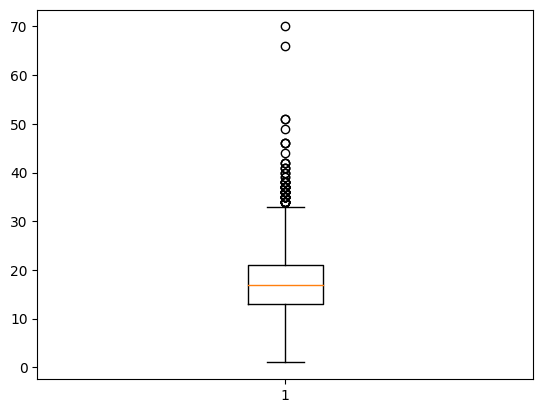

In [99]:
plt.boxplot(tabla_general['total_gb_usados'].dropna())
plt.show()

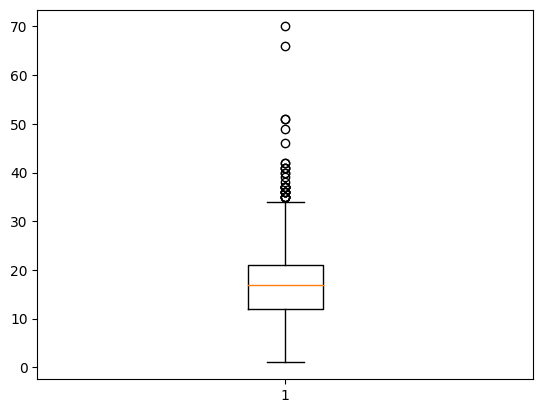

In [100]:
plt.boxplot(tabla_general[tabla_general['plan_id']=='surf']['total_gb_usados'].dropna())
plt.show()

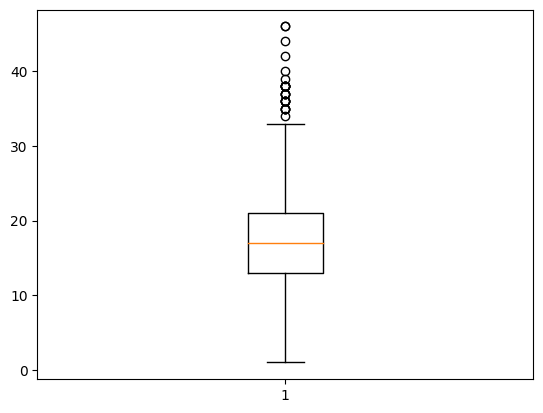

In [101]:
plt.boxplot(tabla_general[tabla_general['plan_id']=='ultimate']['total_gb_usados'].dropna())
plt.show()

Aparentemente los datos de uso de GB no parecen muy diferentes con respecto a cada plan, pero al analizar las diferentes gráficas podemos notar que en el plan ultimate la media es mayor. 

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
    
Utilizaste tablas pivote para calcular el número de llamadas, mensajes y datos de internet por usuario y mes, y graficaste estas distribuciones para analizar el comportamiento de los usuarios.
    
Calculaste estadísticas descriptivas como la media y varianza de la duración de llamadas, número de mensajes y uso de internet, además de trazar diagramas de caja para visualizar la distribución de estos datos.

    
</div>

## Ingreso

Procederemos a ostrar en una gráfica los ingresos de los planes para comprobar su rentabilidad mensual.

In [102]:
plans = ['surf','ultimate']

for plan in plans:
    rentabilidad = tabla_general[tabla_general['plan_id'] == plan]['rentabilidad_mensual'].sum()
    print(f'La rentabilidad mensual del plan {plan} es de : {rentabilidad}')

La rentabilidad mensual del plan surf es de : 95611.18
La rentabilidad mensual del plan ultimate es de : 52346.0


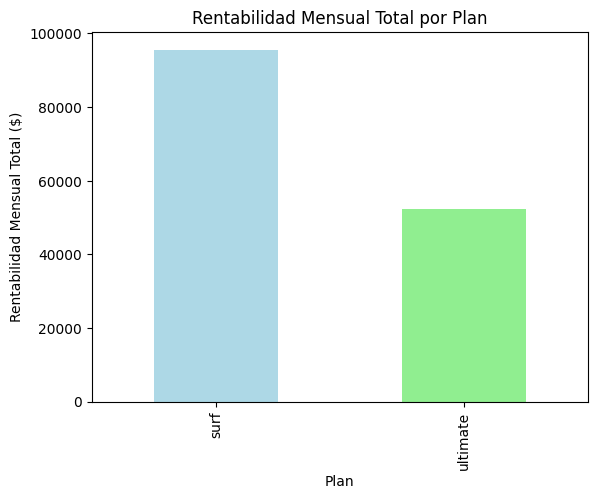

In [103]:
rentabilidad_por_plan = tabla_general.groupby('plan_id')['rentabilidad_mensual'].sum()
rentabilidad_por_plan.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Rentabilidad Mensual Total por Plan')
plt.xlabel('Plan')
plt.ylabel('Rentabilidad Mensual Total ($)')
plt.show()


Aparentemente el plan surf deja más rendimientos, la realidad es que se necesita de más personas para llegar a esos números, mientras que en el plan ultimate, con menos personas se llega a obtener más rendimiento, esto se comprobará o se refutará con la información siguiente.


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
    
Definiste funciones para calcular los minutos, mensajes y datos cobrables para los usuarios que exceden sus límites de plan y calculaste los ingresos mensuales para cada usuario.
    
Comparaste la rentabilidad mensual de los planes Surf y Ultimate, concluyendo que, aunque el plan Surf tiene más usuarios, el plan Ultimate genera más ingresos por usuario.

    
</div>

## Prueba las hipótesis estadísticas

Antes de proceder a realizar la prueba de las hipótesis nula y alternativa, con la información siguiente podemos demostrar que son más los usuarios en surf y que aún así los ingresos de ultimate, aunque parezcan menores, requieren de menos personas para tener un buen ingreso. 

In [104]:
alpha = 0.05
sample_1 = tabla_general.query('plan_id == "surf"')['rentabilidad_mensual']
sample_1

1       20.00
2       20.00
3       90.09
4       60.00
5       60.00
        ...  
2295    20.00
2298    20.00
2299    20.00
2300    20.00
2302    20.00
Name: rentabilidad_mensual, Length: 1579, dtype: float64

In [105]:
sample_2 = tabla_general.query('plan_id == "ultimate"')['rentabilidad_mensual']
sample_2

0       70.0
19      70.0
20      84.0
26      70.0
27      70.0
        ... 
2292    70.0
2293    70.0
2296    70.0
2297    70.0
2301    70.0
Name: rentabilidad_mensual, Length: 724, dtype: float64

Utilizaremos una prueba Ttest_ind para comparar dos muestras y utilizaremos un valor alpha de 0.05 de manera arbitraria.
La hipótesis nula es que los promedios de ambos planes son similares 
La hipótesis alternativa es que son diferentes.



In [106]:
# Prueba las hipótesis
resultados = st.ttest_ind(sample_1,sample_2, equal_var=False)

print(f'p-value: {resultados.pvalue}')

p-value: 1.218411585212325e-15


In [107]:
if resultados.pvalue < alpha:
    print("Podemos rechazar la hipotesis nula")
else: 
    print("No podemos rechazar la hipotesis nula")

Podemos rechazar la hipotesis nula


Se obtienen más ingresos por parte de los usuarios del plan Ultimate.

Probaremos la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [108]:
tabla_general['in_NY_NJ'] = tabla_general['city'].str.contains('NY-NJ', case=False, na=False)

In [109]:
sample_nynj = tabla_general.query('in_NY_NJ == True')['rentabilidad_mensual']
sample_nynj

56       20.00
57       38.84
75       20.00
76      100.00
77       20.00
         ...  
2264    120.42
2265    170.27
2266    200.00
2267    110.33
2297     70.00
Name: rentabilidad_mensual, Length: 378, dtype: float64

In [110]:
sample_others = tabla_general.query('in_NY_NJ == False')['rentabilidad_mensual']
sample_others

0       70.00
1       20.00
2       20.00
3       90.09
4       60.00
        ...  
2298    20.00
2299    20.00
2300    20.00
2301    70.00
2302    20.00
Name: rentabilidad_mensual, Length: 1925, dtype: float64

Utilizaremos ttest_ind  y el valor alpha 0.05 para el análisis 


Hipótesis nula:
El ingreso promedio de los usuarios del área NY-NJ es igual al ingreso promedio de los usuarios de otras regiones. 


Hipótesis alternativa:
El ingreso promedio de los usuarios del área NY-NJ es diferente al ingreso promedio de los usuarios de otras regiones.

In [111]:
# Prueba las hipótesis
resultados_city = st.ttest_ind(sample_nynj,sample_others, equal_var=False)

print(f'p-value: {resultados_city.pvalue}')

p-value: 0.03870322661292944


In [112]:
if resultados_city.pvalue < alpha:
    print("Podemos rechazar la hipotesis nula")
else: 
    print("No podemos rechazar la hipotesis nula")

Podemos rechazar la hipotesis nula


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
    
Realizaste pruebas estadísticas utilizando la prueba T para comparar los ingresos promedio de los usuarios de los diferentes planes, concluyendo que los ingresos de los usuarios del plan Ultimate son significativamente mayores.
    
También comparaste los ingresos de los usuarios del área NY-NJ con los de otras regiones y encontraste diferencias significativas en los ingresos promedio.
    
</div>

## Conclusión general



Realizamos una limpieza de datos, creamos columnas, unimos data frames y convertimos MB a GB para un análisis más claro.


Utilizamos visualizaciones como gráficos de barras, diagramas de caja e histogramas para revelar patrones de uso de llamadas, mensajes y datos en GB.


Usamos la media y la varianza y utilizamos la prueba t de Student e indicó diferencias significativas en los ingresos, destacando la variabilidad en la rentabilidad de cada tarifa.

La conclusión del análisis muestra que, aunque la tarifa Surf tiene más clientes, la tarifa Ultimate, con menos clientes, genera ingresos comparables, lo cual puede resultar confuso. Pero, tras ver los resultados pudimos darnos cuenta que Ultimate puede estar generando más ingresos por usuario. Por tanto, se recomienda enfocar el presupuesto de publicidad en la tarifa más rentable y segmentar clientes según sus patrones de uso para maximizar ingresos.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
    
Sintetizaste los hallazgos y recomendaste enfocar el presupuesto de publicidad en la tarifa más rentable, segmentando a los clientes según sus patrones de uso para maximizar ingresos.

Tu análisis fue metodológico, detallado y bien documentado, lo que facilita la interpretación y comunicación de los resultados. 
  
¡Buen trabajo!

</div>

<div class="alert alert-block alert-warning">
<b>Recomendaciones para el proyecto de tu portafolio</b> <a class="tocSkip"></a>
    
Rachel, aquí tienes algunas recomendaciones específicas para tu proyecto sobre la revisión de outliers y la varianza:
    
    

**Revisión de Outliers**
    
Importancia de Revisar Outliers:

- Influencia en Resultados: Los outliers pueden afectar significativamente los resultados estadísticos, distorsionando la media y la varianza. Esto puede llevar a conclusiones incorrectas sobre el comportamiento de los usuarios.
Calidad de Datos: Identificar y tratar los outliers ayuda a mejorar la calidad de los datos y garantiza que los análisis sean más precisos.

Cómo Aplicarlo:

- Utiliza los diagramas de caja (boxplots) que ya generaste para identificar outliers en la duración de llamadas, el número de mensajes y el uso de internet.

- Considera si estos outliers son errores de datos o valores extremos legítimos. Si son errores, corrígelos o exclúyelos del análisis para evitar distorsiones.
    
**Revisión de la Varianza**
    
Importancia de Revisar la Varianza:

- Asunción de Homogeneidad: Para la prueba T de Student que usaste, es crucial verificar si las varianzas de los ingresos entre las tarifas Surf y Ultimate son iguales. Si las varianzas son diferentes, la asunción de homogeneidad no se cumple, y los resultados de la prueba pueden no ser válidos.
Cómo Aplicarlo:

- Realiza la prueba de Levene para verificar la homogeneidad de las varianzas antes de realizar la prueba T de Student. Esto asegurará que estás utilizando el parámetro correcto (equal_var).

        from scipy.stats import levene

        sample_surf = tabla_general.query('plan_id == "surf"')['rentabilidad_mensual']
        sample_ultimate = tabla_general.query('plan_id == "ultimate"')['rentabilidad_mensual']

        stat, p = levene(sample_surf, sample_ultimate)
        print(f'Prueba de Levene p-value: {p}')

        if p < 0.05:
            print("Las varianzas son significativamente diferentes. Usa `equal_var=False` en ttest_ind.")
        else:
            print("No hay diferencias significativas en las varianzas. Puedes usar `equal_var=True` en ttest_ind.")

        # Prueba T de Student considerando el resultado de la prueba de Levene
        from scipy.stats import ttest_ind

        resultados = ttest_ind(sample_surf, sample_ultimate, equal_var=(p >= 0.05))
        print(f'p-value: {resultados.pvalue}')
        if resultados.pvalue < 0.05:
            print("Podemos rechazar la hipotesis nula")
        else:
            print("No podemos rechazar la hipotesis nula")                                    


</div>